<a href="https://colab.research.google.com/github/sarinananya/YBI_MLmodels/blob/main/DiabetesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Model

# Step 1: **Importing the dataset**

---



In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**observation**: we have one target variable i.e. 'diabetes' and all others are independent variables i.e. features: pregnancies	glucose	diastolic	triceps	insulin	bmi	dpf	age

# Step 2: **Analysing the dataset**

---



In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**observation**: the dataset has no sting type variable, it has 7 integer type and 2 float type variables

In [6]:
#checking for missing data
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

Thoug we checked that the dataset has no missing values bit it contains many zeros

In [9]:
df.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Step 3: **Data Visualization**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


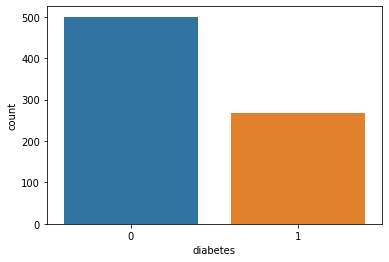

In [8]:
import seaborn as sns
sns.countplot(df['diabetes'])

**observation**: Number of diabetic people are almost half the number of non diabetic people, which implies **imbalanced dataset**

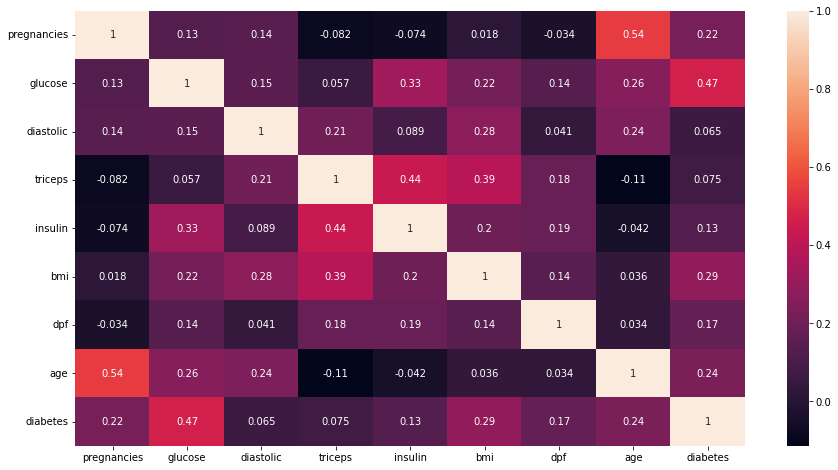

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**observation:** From the correaltion heatmap, we can see that there is a high correlation between Outcome and **[Glucose,BMI,Age,Insulin]**. We can select these features to accept input from the user and predict the outcome.

# Step 4: **Data Preprocessing**

---



In [13]:
df.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [14]:
df_new= df
df_new[["glucose", "diastolic", "triceps", "insulin", "bmi"]] = df_new[["glucose", "diastolic", "triceps", "insulin", "bmi"]].replace(0, np.NaN) 

In [15]:
df_new.isnull().sum()

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [16]:
df_new["glucose"].fillna(df_new["glucose"].mean(), inplace = True)
df_new["diastolic"].fillna(df_new["diastolic"].mean(), inplace = True)
df_new["triceps"].fillna(df_new["triceps"].mean(), inplace = True)
df_new["insulin"].fillna(df_new["insulin"].mean(), inplace = True)
df_new["bmi"].fillna(df_new["bmi"].mean(), inplace = True)

# Step 5: **Feature Scaling**

---



In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df_new)

In [20]:
df_scaled = pd.DataFrame(df_scaled)

In [25]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [27]:
X = df_scaled.iloc[:,[1, 4, 5, 7]].values
Y = df_scaled.iloc[:, 8].values

# Step 5: **Train Test Split**

---



In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

# Step 6: **Modelling**

---



# 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

# 2. Support Vector Machine

In [30]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

# 3. Decision tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
#making predictions
Y_pred_logreg = logreg.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)


# Step 7: **model Evaluation**

In [33]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)


In [34]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dectree * 100))


Logistic Regression: 75.32467532467533
Support Vector Classifier: 76.62337662337663
Decision tree: 70.12987012987013
